# AML GROUP 12 PROJECT:
by -> Dharun Gautham J (21123006) and Varun Raizada (21105125)


Objective: To determine the profitabilty of a movie prior to it's release. To do this we will be using  classification techniques. We will calculate  if a movie will earn profit (return >1) or loss (return<1).

# Movie Data Set

This dataset is derived from Kaggle "The Movies Dataset".We'll be working with "movies_metadata", the metadata for over 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include budget, revenue, release dates, languages, production companies, countries, IMDB vote counts and vote averages, etc.

Through data information, we can see that the original dataset has 45466 entries, and 24 total columns. Most of columns are object value which cannot be directly feed into neural networks. So we need to process them and change into numeric variables.

# Overview

* a) Data Preparation

* b) Exploratory Data Analysis

* c) Data Engineering

* d) Classification modeling

* e) Results

* f) Conclusion

# Data Gathering and Description

In this part, we'll set up the environment, import modules, read the data, and explore our data. Through the data processing, we'll change data types to fit models, handle missing values, and detect any outliers. After that, we'll wrangle the data, split data into X and y, and do some scalling preparing for modeling.

Below are columns of the datasaet:

* adult - Belongs to adult movies or not
* belongs_to_collection - Belong to movie collections or not
* budget - The budget of a movie. Some movies don't have this, it appears as 0
* genres - Main genre of the movie
* homepage - The website where can see the movie
* id - Identifier column
* imdb_id - Movies id on IMDB
* original_language - Original language of film
* original_title - Original title of film
* overview - Movie content overview
* popularity - shows weather it is popular
* poster_path - jpg. path of the movie poster
* production_companies - The production company
* production_countries - Country of origin
* release_date - Release date (YYYY-MM-DD)
* revenue - The revenue of a movie. Some movies don't have this, it appears as 0
* runtime - Duration of the movie
* spoken_languages - Languages spoken throughout the film
* status - Release or others
* tagline - Movie tagline to advertise
* title - English title
* video - True of False
* vote_average - TMDB vote average
* vote_count - TMDB vote count

In [57]:
# for reading data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# For data splitting
from sklearn.model_selection import train_test_split

from sklearn import svm # SVM
from sklearn.tree import DecisionTreeClassifier # DTR
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # LR
from sklearn.model_selection import GridSearchCV

# classification error metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_excel("TrainingData3.xlsx")

# Head, Shape, Column names, data types, missing values, Outliers

In [24]:
df.head()

,0,1960,1
0,0.05,1960,1
1,0.10,1960,1
2,0.15,1960,1
3,0.20,1960,1
4,0.25,1960,1


In [25]:
df.columns=['Depth','Speed','Stability']
df.head()

,Depth,Speed,Stability
0,0.05,1960,1
1,0.10,1960,1
2,0.15,1960,1
3,0.20,1960,1
4,0.25,1960,1


In [26]:
#Summary of original dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth      1070 non-null   float64
 1   Speed      1070 non-null   int64  
 2   Stability  1070 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 25.2 KB


In [27]:
#Shape of original dataset
df.shape

(1070, 3)

There are a total of 45,466 movies with 24 features. Most of the features have very few NaN values (apart from homepage and tagline). We will attempt at cleaning this dataset to a form suitable for analysis in the next section.

Text(0, 0.5, 'Frequency')

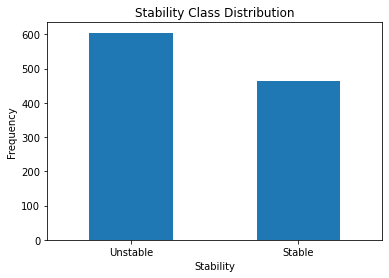

In [29]:
# voter_rating vs frequency plot
df.value_counts(df['Stability']).plot(kind='bar',rot=0)
plt.title("Stability Class Distribution")
LABELS=['Unstable','Stable']
plt.xticks(range(2), LABELS)
plt.xlabel("Stability")
plt.ylabel("Frequency")

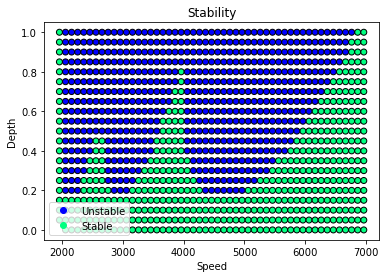

In [45]:
scatter = plt.scatter(df['Speed'], df['Depth'], c=df['Stability'],cmap='winter',alpha=1,edgecolors='black')
plt.legend(handles=scatter.legend_elements()[0], labels=['Unstable','Stable'])
plt.xlabel('Speed')
plt.ylabel('Depth')
plt.title('Stability')
plt.show()

# Data Engineering

# Split Data into X and Y

In [52]:
# Assign X and Y
X_train = df.drop(['Stability'], axis=1)
y_train = df['Stability']

print(X_train.shape)
print(y_train.shape)

(1070, 2)
(1070,)


In [53]:
df_test=pd.read_excel('TestinData.xlsx')
df_test.columns=['Depth','Speed','Stability']
df_test.head()

,Depth,Speed,Stability
0,0.01,1960,1
1,0.02,1960,1
2,0.03,1960,1
3,0.04,1960,1
4,0.05,1960,1


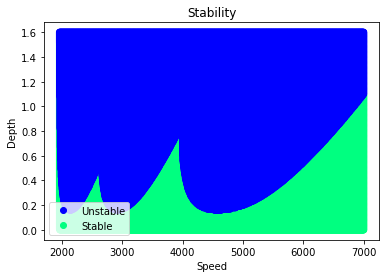

In [76]:
scatter = plt.scatter(df_test['Speed'], df_test['Depth'], c=df_test['Stability'],cmap='winter',alpha=1)
plt.legend(handles=scatter.legend_elements()[0], labels=['Unstable','Stable'])
plt.xlabel('Speed')
plt.ylabel('Depth')
plt.title('Stability')
plt.show()

In [54]:
# Assign X and Y
X_test = df_test.drop(['Stability'], axis=1)
y_test = df_test['Stability']

print(X_test.shape)
print(y_test.shape)

(162448, 2)
(162448,)


In [55]:
# shape check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 2) (162448, 2) (1070,) (162448,)


# 1) Logistic Regression Model

In [58]:
#Fit the model
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)

In [59]:
# store the predictions
train_preds_LR = LR.predict(X_train) 
test_preds_LR = LR.predict(X_test) 

In [60]:
#Evaluate the model
# train confusion matrix
confusion_matrix(y_train, train_preds_LR)

array([[527,  78],
       [135, 330]], dtype=int64)

In [61]:
# test confusion matrix
confusion_matrix(y_test, test_preds_LR)

array([[111369,   8283],
       [ 11642,  31154]], dtype=int64)

In [62]:
# extract TP, TN, FP, FN
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_LR).ravel()
(tn, fp, fn, tp)

(111369, 8283, 11642, 31154)

In [63]:
ac1 = accuracy_score(y_test,test_preds_LR)
print('accuracy for Logistic regression =', round(ac1*100,5) , '%')
print(classification_report(y_test, test_preds_LR))

accuracy for Logistic regression = 83.66935 %
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       248
           1       0.79      0.91      0.85       248

    accuracy                           0.84       496
   macro avg       0.84      0.84      0.84       496
weighted avg       0.84      0.84      0.84       496



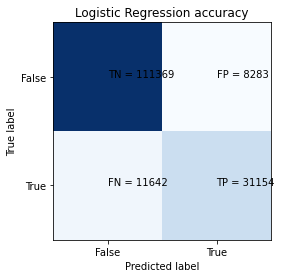

In [63]:
cm = confusion_matrix(y_test, test_preds_LR)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['False','True']
plt.title('Logistic Regression accuracy')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

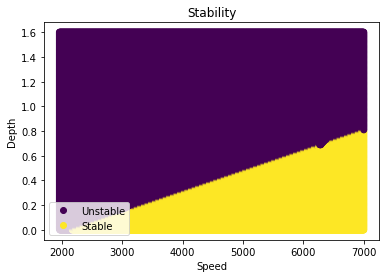

In [78]:
scatter = plt.scatter(X_test.iloc[:,1], X_test.iloc[:,0], c=test_preds_LR,alpha=1)
plt.legend(handles=scatter.legend_elements()[0], labels=['Unstable','Stable'])
plt.xlabel('Speed')
plt.ylabel('Depth')
plt.title('Stability')
plt.show()

#2) ANN

In [79]:
# Setting up the model
ann = Sequential()
# this is hidden layer 1
ann.add(Dense(6,activation='relu', input_shape=(X_train.shape[1],))) # input shape is = (features,)
# this is hidden layer 2
ann.add(Dense(6, activation='relu'))
# this is the output node
ann.add(Dense(1, activation='sigmoid')) 

NameError: name 'Sequential' is not defined

In [66]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 96        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [67]:
layer=ann.layers[0]
W=layer.get_weights()
W

[array([[-0.16145474,  0.00284117,  0.06090337, -0.16029772, -0.4555411 ,
         -0.01142347],
        [ 0.35624856, -0.5053363 ,  0.4287151 , -0.32741207,  0.3964749 ,
         -0.27638403],
        [-0.43384314,  0.24315327,  0.51364154,  0.3242672 , -0.11918974,
         -0.42190787],
        [-0.4111472 ,  0.49851328,  0.30974758, -0.299892  ,  0.2852921 ,
          0.04053462],
        [ 0.21385121, -0.25766283, -0.5063126 , -0.08326197,  0.12957561,
         -0.48056242],
        [-0.0383178 , -0.28886932,  0.18347472,  0.4256763 , -0.31438297,
          0.5003106 ],
        [-0.05969256,  0.18776578,  0.49640125,  0.10823846, -0.34375513,
          0.3659112 ],
        [-0.5198155 ,  0.32263142,  0.40704966, -0.00884372,  0.47323674,
         -0.09795147],
        [-0.17976749,  0.18948644,  0.27681643,  0.42541134, -0.42956156,
         -0.5331335 ],
        [-0.12442625, -0.19381154, -0.49562827, -0.3758703 ,  0.44287175,
          0.04488581],
        [ 0.2499057 ,  0.43287

In [68]:
layer=ann.layers[1]
W=layer.get_weights()
W

[array([[-0.07693231,  0.20576864,  0.6758805 ,  0.22390175,  0.21764815,
         -0.6226312 ],
        [ 0.30807167, -0.3008516 ,  0.50988513,  0.7051433 , -0.1687501 ,
          0.56249017],
        [-0.03050488, -0.28284597,  0.48338383, -0.1752277 ,  0.01545376,
         -0.12042683],
        [ 0.06717366, -0.54902035, -0.38190743,  0.4252748 ,  0.5749958 ,
          0.11619633],
        [ 0.3422014 ,  0.34184223, -0.6774061 , -0.5192686 ,  0.4187309 ,
         -0.27823833],
        [ 0.22319674, -0.37747306, -0.07027245, -0.07249361, -0.2687949 ,
          0.38301367]], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32)]

In [69]:
layer=ann.layers[2]
W=layer.get_weights()
W

[array([[-0.17159939],
        [-0.4610484 ],
        [ 0.00832844],
        [ 0.635885  ],
        [ 0.6490892 ],
        [ 0.61394465]], dtype=float32), array([0.], dtype=float32)]

In [70]:
#  this compiles the model, specifies model evaluation metrics
ann.compile(optimizer='Adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [71]:
es2 = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True)
# fit model
history2 = ann.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=100, 
                    batch_size = 44,
                    verbose=1, 
                    callbacks=[es2])

Epoch 1/100
46/46 [==============================] - 2s 19ms/step - loss: 0.7604 - accuracy: 0.5373 - val_loss: 0.7396 - val_accuracy: 0.5363
Epoch 2/100
46/46 [==============================] - 0s 8ms/step - loss: 0.6897 - accuracy: 0.6216 - val_loss: 0.6800 - val_accuracy: 0.6351
Epoch 3/100
46/46 [==============================] - 0s 8ms/step - loss: 0.6358 - accuracy: 0.7144 - val_loss: 0.6282 - val_accuracy: 0.7238
Epoch 4/100
46/46 [==============================] - 0s 6ms/step - loss: 0.5825 - accuracy: 0.7770 - val_loss: 0.5786 - val_accuracy: 0.7581
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 0.5294 - accuracy: 0.8179 - val_loss: 0.5299 - val_accuracy: 0.7903
Epoch 6/100
46/46 [==============================] - 0s 8ms/step - loss: 0.4800 - accuracy: 0.8385 - val_loss: 0.4903 - val_accuracy: 0.8004
Epoch 7/100
46/46 [==============================] - 0s 9ms/step - loss: 0.4342 - accuracy: 0.8481 - val_loss: 0.4552 - val_accuracy: 0.8306
Epoch 8/100


In [72]:
history_dict2 = history2.history
history_dict2.keys() 

# out of all of these, let's plot the val_mean_absolute_error

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

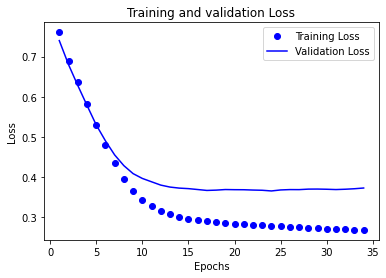

In [73]:
ac2 = history2.history['accuracy']
val_ac2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(1, len(ac2) + 1)

# "bo" is for "blue dot"
plt.plot(epochs2, loss2, 'bo', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs2, val_loss2, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

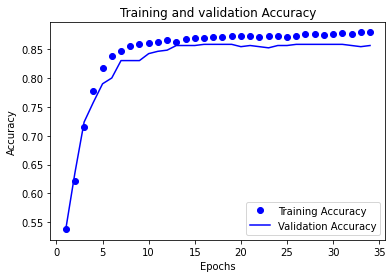

In [74]:
plt.plot(epochs2, ac2, 'bo', label='Training Accuracy')
plt.plot(epochs2, val_ac2, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [75]:
# if we don't round to a whole number (0 or 1), the confusion matrix won't work!
preds2 = np.round(ann.predict(X_test),0)

# confusion matrix
confusion_matrix(y_test, preds2)

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

array([[196,  52],
       [ 19, 229]])

In [76]:
ac3 = accuracy_score(y_test,preds2)
print('accuracy =',ac3)
print(classification_report(y_test, preds2))

accuracy = 0.8568548387096774
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       248
           1       0.81      0.92      0.87       248

    accuracy                           0.86       496
   macro avg       0.86      0.86      0.86       496
weighted avg       0.86      0.86      0.86       496



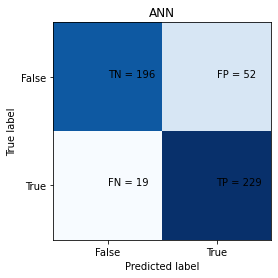

In [77]:
cm = confusion_matrix(y_test, preds2)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['False','True']
plt.title('ANN')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

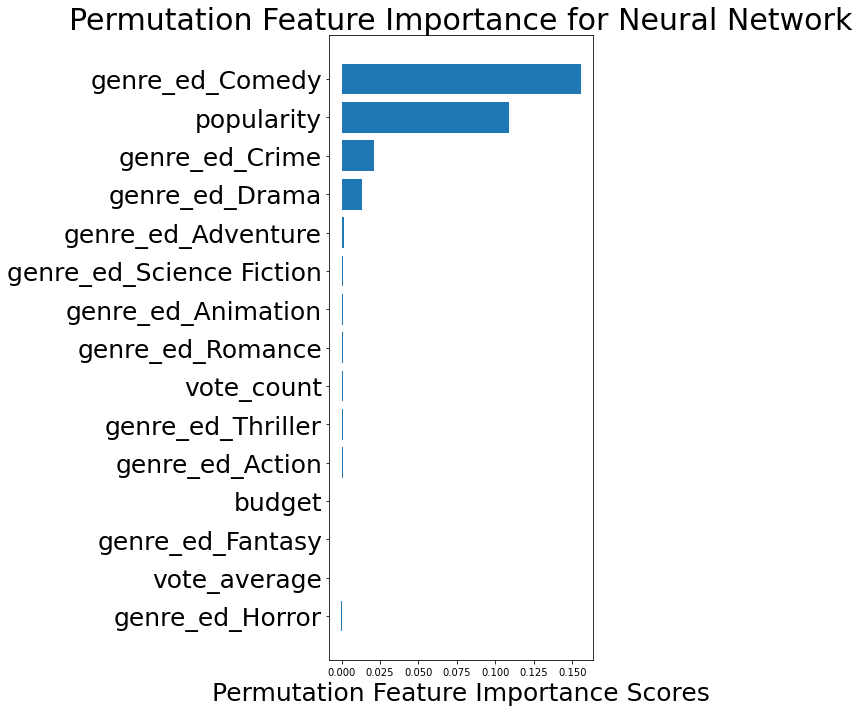

In [78]:
#Feature Importance for ANN

from sklearn.inspection import permutation_importance

results = permutation_importance(ann,X_train,y_train, scoring='neg_root_mean_squared_error')

plt.figure(figsize=(10,10))

#get importance
importance_nn = results.importances_mean
sorted_idx = np.argsort(importance_nn)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, importance_nn[sorted_idx],align='center')

plt.yticks(pos,X_train.columns[sorted_idx],fontsize=25)
plt.xlabel('Permutation Feature Importance Scores', fontsize=25)
#plt.xticks(fontsize=100)
plt.title('Permutation Feature Importance for Neural Network', fontsize=30)

plt.tight_layout()

plt.show()

# 3) SVM

In [134]:
svc = svm.SVC(kernel='rbf',C=10,gamma=1)
svc.fit(X_train,y_train)

SVC(C=1000, gamma=1)

In [135]:
y_pred = svc.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [136]:
cm = confusion_matrix(y_test, y_pred)
ac4 = accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cm)
print('accuracy =',ac4)
print(cr)

[[  5790 113862]
 [    19  42777]]
accuracy = 0.29896951639909386
              precision    recall  f1-score   support

           0       1.00      0.05      0.09    119652
           1       0.27      1.00      0.43     42796

    accuracy                           0.30    162448
   macro avg       0.63      0.52      0.26    162448
weighted avg       0.81      0.30      0.18    162448



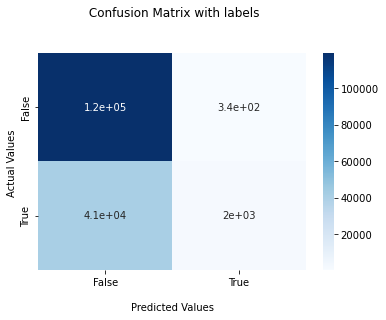

In [83]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

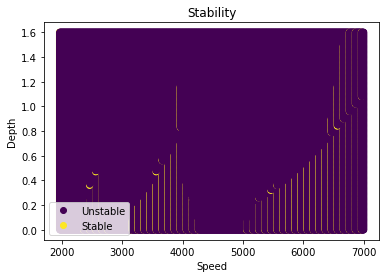

In [84]:
scatter = plt.scatter(X_test.iloc[:,1], X_test.iloc[:,0], c=y_pred,alpha=1)
plt.legend(handles=scatter.legend_elements()[0], labels=['Unstable','Stable'])
plt.xlabel('Speed')
plt.ylabel('Depth')
plt.title('Stability')
plt.show()

# 4) KNN

In [83]:
param_grid = {'n_neighbors': [2, 4, 6, 8, 10]}
 
knn = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 1)
knn.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10]}, verbose=1)

In [84]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,

In [85]:
cm = confusion_matrix(y_test, y_pred)
ac5 = accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cm)
print('accuracy =',ac5)
print(cr)

[[199  49]
 [ 21 227]]
accuracy = 0.8588709677419355
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       248
           1       0.82      0.92      0.87       248

    accuracy                           0.86       496
   macro avg       0.86      0.86      0.86       496
weighted avg       0.86      0.86      0.86       496



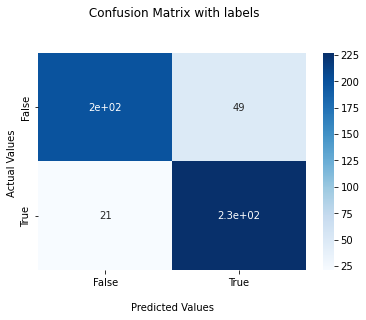

In [86]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 5) Decision Tree Classifier:

In [87]:
param_grid = {'criterion':['entropy','gini'],
              'max_depth':[2,4,6,8,10,12]}
 
dt = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 1)
dt.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             verbose=1)

In [88]:
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,

In [89]:
cm = confusion_matrix(y_test, y_pred)
ac6 = accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cm)
print('accuracy =',ac6)
print(cr)

[[212  36]
 [ 11 237]]
accuracy = 0.905241935483871
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       248
           1       0.87      0.96      0.91       248

    accuracy                           0.91       496
   macro avg       0.91      0.91      0.91       496
weighted avg       0.91      0.91      0.91       496



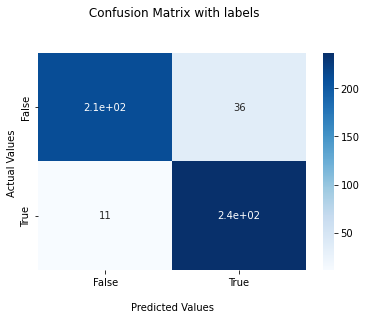

In [90]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [91]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from IPython.display import Image
import os

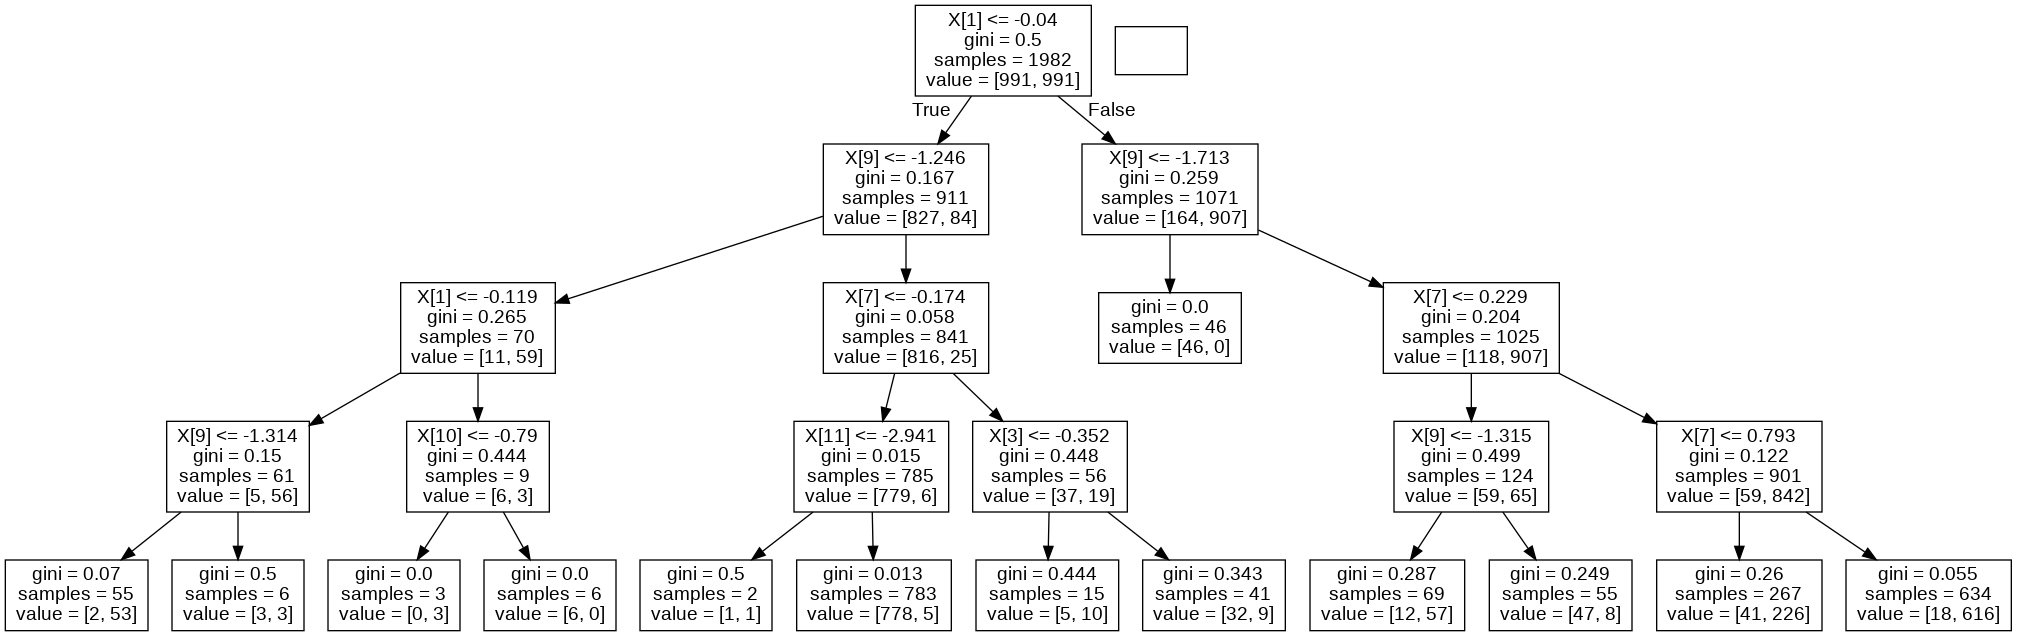

In [96]:
tree.export_graphviz(dt.best_estimator_,out_file='tree.dot') 
dot_data = StringIO() 
tree.export_graphviz(dt.best_estimator_, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
a=graph.write_png("tree.png") 
Image(filename=os.getcwd()+'/tree.png')

In [94]:
print('accuracy for Logistic regression =', round(ac1*100,5) , '%')
print('accuracy for ANN =', round(ac3*100,5) , '%')
print('accuracy for SVM =', round(ac4*100,5) , '%')
print('accuracy for KNN =', round(ac5*100,5) , '%')
print('accuracy for Decision tree =', round(ac6*100,5) , '%')

accuracy for Logistic regression = 83.66935 %
accuracy for ANN = 85.68548 %
accuracy for SVM = 85.68548 %
accuracy for KNN = 85.8871 %
accuracy for Decision tree = 90.52419 %


# Results

* We implemented a Logistic Regression, ANN, SVM, KNN and Decision Tree Classifier for classification . 

* All model are giving nearly same accuracy of almost 90% so we can’t choose one over another just based on accuracy alone but with help of any of these model we can predict success or failure of a movie.
 
* Predicting movie revenue can significantly impact the movie industries and is the prime focus area for movie companies to remain profitable. Based on predictions a movie house can change its release strategy to either cut losses or increase movies chance of success.

* In real world this can mean a loss or gain of millions of dollars and hence, researchers worldwide had undertaken significant research to understand which factors can affect the increase in movie revenue. Factors such as budget, popularity, vote count, and movie genre can increase movie revenue.